我们构建朴素贝叶斯模型进行垃圾邮件分类的步骤如下：
1. 创建词典，使用已经处理过的数据集Ling-spam
2. 提取特征
3. 训练分类器
4. 测试分类器效果

## 创建词典
我们打开数据集中的一封样本邮件可以得到如下信件内容：

In [1]:
sample_email = open("./lingspam_public/lemm_stop/part1/3-1msg1.txt","r")
print(sample_email.read())

Subject: re : 2 . 882 s - > np np

> deat : sun , 15 dec 91 2 : 25 : 2 est > : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 query > > wlodek zadrozny ask " anything interest " > construction " s > np np " . . . second , > much relate : consider construction form > discuss list late reduplication ? > logical sense " john mcnamara name " tautologous thus , > level , indistinguishable " , , here ? " . ' john mcnamara name ' tautologous support those logic-base semantics irrelevant natural language . sense tautologous ? supplies value attribute follow attribute value . fact value name-attribute relevant entity ' chaim shmendrik ' , ' john mcnamara name ' false . tautology , . ( reduplication , either . )



In [2]:
# python读文件的另一种方式
with open('./lingspam_public/lemm_stop/part1/3-1msg2.txt') as f:
    print(f.read())

# 再读取一封没有经过文本清洗处理的信件
with open('./lingspam_public/bare/part1/3-1msg2.txt') as f:
    print(f.read())

Subject: s - > np + np

discussion s - > np + np remind ago read , source forget , critique newsmagazine ' unique tendency write style , most writer overly " cute " . one item tersely put down follow : " 's favorite : colon . " - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - lee hartman ga5123 @ siucvmb . bitnet department foreign language southern illinoi university carbondale , il 62901 u . s . .

Subject: s - > np + np

the discussion of s - > np + np reminds me that some years ago i read , in a source now forgotten , a critique of some newsmagazines ' unique tendencies in writing style , most of which the writer found overly " cute " . one item was tersely put down as follows : " time 's favorite : the colon . " - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - lee hartman ga5123 @ siucvmb . bitnet department of foreign languages southern illinois university carbondale , il 62901 u . s . a .



从上面两封邮件可以看出，信件的内容是从第三行开始的。我们的第一步是建立一个词典，词典中单词和它的出现的频率一一映射。我们先读取出训练数据集中信件中的所有单词，然后使用Counter类计算出，每个词对应的次数，存入dictionary中。

In [3]:
import os
import collections
def make_Dictionary(train_dir):
    #emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    emails = []
    emails.append(train_dir)
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
     
    dictionary = collections.Counter(all_words)
    
    # clear word that is not alpha, like numbers
    # and clear word length = 1, like '>'
    # make the frequency of that words to be zero
    list_to_remove = dictionary.keys()
    for item in list_to_remove:
        if item.isalpha() == False: 
            dictionary[item]=0
        elif len(item) == 1:
            dictionary[item]=0
    # end of clear
    # choose the words which frequecy > 2 as feature
    new_dict = []
    for word,freq in dictionary.items():
        if freq > 2:
            new_dict.append({word,freq})
    print(new_dict)
    #dictionary = dictionary.most_common(3)
    return dictionary

In [4]:
# 测试make_Dictionary函数
# 针对一封信进行测试
print(make_Dictionary('./lingspam_public/lemm_stop/part1/3-1msg1.txt'))

[{3, 'john'}, {3, 'mcnamara'}, {'name', 3}, {3, 'tautologous'}, {3, 'value'}]
Counter({'john': 3, 'mcnamara': 3, 'name': 3, 'tautologous': 3, 'value': 3, 'construction': 2, 'np': 2, 'reduplication': 2, 'sense': 2, 'attribute': 2, 'deat': 1, 'sun': 1, 'dec': 1, 'est': 1, 'michael': 1, 'mmorse': 1, 'yorku': 1, 'ca': 1, 'subject': 1, 're': 1, 'query': 1, 'wlodek': 1, 'zadrozny': 1, 'ask': 1, 'anything': 1, 'interest': 1, 'second': 1, 'much': 1, 'relate': 1, 'consider': 1, 'form': 1, 'discuss': 1, 'list': 1, 'late': 1, 'logical': 1, 'thus': 1, 'level': 1, 'indistinguishable': 1, 'here': 1, 'support': 1, 'those': 1, 'semantics': 1, 'irrelevant': 1, 'natural': 1, 'language': 1, 'supplies': 1, 'follow': 1, 'fact': 1, 'relevant': 1, 'entity': 1, 'chaim': 1, 'shmendrik': 1, 'false': 1, 'tautology': 1, 'either': 1, '>': 0, ':': 0, ',': 0, '15': 0, '91': 0, '2': 0, '25': 0, '<': 0, '@': 0, 'vm1': 0, '.': 0, '864': 0, '"': 0, 's': 0, '?': 0, "'": 0, 'logic-base': 0, 'name-attribute': 0, '(': 0, ')

推广一封信至整个数据集

In [5]:
import os
import collections
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
     
    dictionary = collections.Counter(all_words)
    
    # clear word that is not alpha, like numbers
    # and clear word length = 1, like '>'
    # make the frequency of that words to be zero
    list_to_remove = dictionary.keys()
    for item in list_to_remove:
        if item.isalpha() == False: 
            dictionary[item]=0
        elif len(item) == 1:
            dictionary[item]=0
    # end of clear
    # choose the words which frequecy > 20 as feature
    # copy new_dict
    new_dict = dictionary.copy()
    # delete the freq < 20 in new dict
    for word,freq in dictionary.items():
        if freq < 20:
            del new_dict[word]
    return new_dict

In [6]:
# 对目录'./lingspam_public/lemm_stop/part1/'中的所有信件建立字典
# 打印字典的大小
# 打印出前十个高频词
dictionary = make_Dictionary('./lingspam_public/lemm_stop/part1/')
print(len(dictionary))
# k表示我们的特征数
k = len(dictionary)
print(dictionary.most_common(10))

546
[('language', 520), ('university', 296), ('one', 290), ('de', 253), ('linguistic', 234), ('work', 232), ('email', 216), ('information', 204), ('order', 203), ('address', 200)]


由上可知，我们的高频词有546个。我们用这些词作为特征计算出训练集中每一封信件的单词数向量，这个向量有546维。通常一封邮件的词频向量大部分维度都可能为零。
我们要生成一个包含所有训练集中邮件的特征矩阵，矩阵的行数表示邮件数，列数表示特征向量长度。矩阵的值$m_{i,j}$表示，第i封信件中是否出现了第j个敏感词，$m_{i,j}=1$表示出现，$m_{i,j}=0$表示不出现。

In [7]:
import numpy as np
def extract_features(mail_dir,dictionary): 
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),len(dictionary)))
    print(len(files))
    docID = 0;
    for fil in files:
      with open(fil) as fi:
        for i,line in enumerate(fi):
          if i == 2:
            words = line.split()
            for word in words:
              wordID = 0
              for i,d in enumerate(dictionary):
                if d[0] == word:
                  wordID = i
                  features_matrix[docID,wordID] = 1
                  #features_matrix[docID,wordID] = words.count(word)
        docID = docID + 1    
    return features_matrix

In [8]:
matrix = extract_features('./lingspam_public/lemm_stop/part1/',dictionary)

289


In [9]:
# 打印出倒数第二份信的词向量
#print(matrix[-2])
# 数一数有多少个高频次在这封信中存在
print(matrix[-2].sum(axis=0))
# 竟然有182个高频词在这封信中出现
print(matrix.shape)
print(matrix[:3].shape)

178.0
(289, 546)
(3, 546)


# 训练模型参数
从训练集的数据可以知道，训练集每封邮件的标签，在'./lingspam_public/lemm_stop/part1/'中有289封邮件，其中241封为正常邮件，48封为垃圾邮件，所以我们可以定义训练集的标签数组，前241为0，后48为1，其中0表示正常邮件，1表示垃圾邮件。

In [10]:
train_labels = np.zeros(289)
train_labels[-48:]=1
print(train_labels.shape)
n_1=train_labels.sum(axis=0)
print(n_1)
n=len(train_labels)
print(n)
# 估计当Y是垃圾邮件时的概率=P_Y
# 使用垃圾邮件的封数与总邮件数的比值
P_Y = n_1/n
print(P_Y)
# 获得了P(Y)的先验概率，Y就是本例中的邮件类别C

(289,)
48.0
289
0.16608996539792387


估计条件概率$P(X\mid Y=垃圾邮件)$ 

In [11]:
print(matrix[:241].sum(axis=0).shape)
# 再求条件概率P(X|Y) 
k = len(dictionary)
P_X_Y = np.zeros(k)
#P_X_Y = np.zeros((2,k))
# 当邮件为垃圾邮件时，特征词在信中存在时的条件概率估计
# P(X_i=1|Y=1)表示为P_X_Y[1]
# 特征词在垃圾邮件中出现的封数与总的垃圾邮件数的比值
# 为了避免零概率问题，我们使用Laplace smoothing
# 即特征词在垃圾邮件中出现的封数加一后与垃圾邮件加总邮件数的比值来估计
P_X_Y = (matrix[-48:].sum(axis=0)+1)/(n_1+n)
#P_X_Y[1] = (matrix[-48:].sum(axis=0)+1)/(n_1+n)
# 当邮件为正常邮件时，高频词在信中存在时的条件概率
# P_X_Y[0]表示P(X_i=1|Y=0)
# 特征词在正常邮件中出现的封数加一与正常邮件加总邮件数的比值
#P_X_Y[0] = (matrix[:241].sum(axis=0)+1)/(n-n_1+n)

# 打印当邮件为垃圾邮件时，前10个高频词在信中存在时的条件概率
print(P_X_Y[-10:])
#print(P_X_Y[1,1:10])
# 当邮件为垃圾邮件时，高频词不在信中的概率
#print(P_X_Y[0,1:10])
# 预测当邮件正常时，高频词在信中存在的概率比邮件为垃圾邮件时的概率要低

(546,)
[0.01186944 0.02077151 0.00296736 0.01780415 0.02077151 0.00593472
 0.00890208 0.03560831 0.04747774 0.01186944]


In [12]:
# test 条件概率和
print(P_X_Y.shape)

(546,)


np.sum(axis=0)表示按列的方向求和

# 使用模型进行分类
模型的两个参数已经估计完成，使用测试集对模型进行测试。
我们选用'./lingspam_public/lemm_stop/part9/'的所有信件作为测试数据集。我们已经知道测试数据集中有289封信，其中垃圾邮件48封，正常邮件241封。

In [13]:
# 提取测试数据集中的特征词频向量组成的矩阵
# 词典还是使用测试集中找出的高频词
dictionary = make_Dictionary('./lingspam_public/lemm_stop/part1/')
test_matrix = extract_features('./lingspam_public/lemm_stop/part9/',dictionary)
# 打印出倒数第二份信的词向量
#print(matrix[-2])
# 数一数有多少个高频次在这封信中存在
print(test_matrix[-2].sum(axis=0))
# 竟然有182个高频词在这封信中出现
print(test_matrix.shape)
test_num=289
test_spam=48
test_ham=241

289
90.0
(289, 546)


In [14]:
# 邮件正常时，特征存在的条件概率
P_X_Y_0 = (matrix[:241].sum(axis=0)+1)/(n-n_1+n)
b=1-P_Y
i=0
for p in P_X_Y_0:
    if test_matrix[4][i]==0:
        b*=1-p
    else:
        b*=p
    i=i+1
print(b)

2.8399128433237088e-59


In [15]:
# 预测一封信为垃圾邮件的概率
# P(Y|X)=P(Y)P(X|Y)
P_Y_X = np.ones(291)*P_Y
print(P_Y_X.shape)
print(P_X_Y.shape)
print(test_matrix[0][0])
i=0
a=P_Y
for p in P_X_Y:
    if test_matrix[4][i]==0:
        a*=1-p
    else:
        a*=p
    i=i+1
print(a)

(291,)
(546,)
0.0
7.865195288588789e-75


In [16]:
P_Y_X = np.ones(test_num)*P_Y
P_Y_0_X = np.ones(test_num)*(1-P_Y)
predict = np.zeros(test_num)
j=0
for mail in test_matrix:
    i=0
    for p in P_X_Y:
        if mail[i]==0:
            P_Y_X[j]*=1-p
        else:
            P_Y_X[j]*=p
        i=i+1
    i=0
    for p in P_X_Y_0:
        if mail[i]==0:
            P_Y_0_X[j]*=1-p
        else:
            P_Y_0_X[j]*=p
        i=i+1
    if P_Y_X[j] > P_Y_0_X[j]:
        predict[j]=1
    j=j+1

In [17]:
print(type(dictionary.keys()))

<class 'dict_keys'>


In [18]:
import pandas as pd
import numpy as np
a = np.arange(len(dictionary.keys())).reshape(1,len(dictionary.keys()))
b = np.array([0, 1, 0, 1, 0]).reshape(1,5)
print(P_X_Y_0.shape)
df_a = pd.DataFrame(P_X_Y_0.reshape(1,P_X_Y_0.shape[0]), columns=dictionary.keys())
#print(dictionary.keys().shape)
#df_b = pd.DataFrame(, columns=[1,2,3,4,5])
#print(df_a)
#df_a[df_b==0] = 4 - df_a[df_b==0]
df_a

SyntaxError: invalid syntax (<ipython-input-18-c41652981f1c>, line 8)

In [19]:
print(predict[-20:-10])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
# 我们已经知道测试数据集中有291封信，其中垃圾邮件49封，正常邮件242封。
test_labels=np.zeros(test_num)
test_labels[-test_spam:]=1
a = test_labels-predict
b = test_labels+predict
con_matrix=[[len(b[b==0]),len(a[a==1])],
           [len(a[a==-1]),len(b[b==2])]]
print(con_matrix)
print(len(a[a==0])/test_num)

[[169, 31], [72, 17]]
0.643598615916955


使用sklearn的Confusion matrix计算出模型在测试集上的表现结果。通过Confusion matrix我们可以看出，对角线上的值表示正确分类的数量，而非对角线上的值表示错误分类的数量。如果对角线上的值越大表明正确分类的数量越多，模型也越好。
我们绘制了confusion matrix的图，可以很清晰地看出有多少类别被错误分类了。

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[169  72]
 [ 31  17]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.65 0.35]]


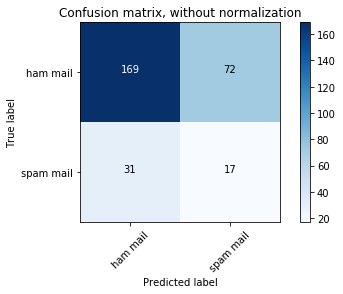

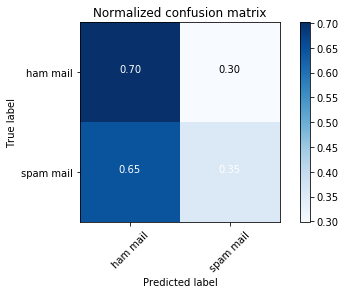

In [28]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predict)
np.set_printoptions(precision=2)

class_names=['ham mail', 'spam mail']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

针对同一个测试数据集，我自己写的模型正确率为64%，但是调用sklearn库模型的正确率为79%，这个说明我的模型还可以提高。我的模型和sklearn的模型有什么差异呢？